# Demo for waypoint generator

## 1. Import All necessary libraries, including custom library from "waypoint.py"

In [1]:
from waypoint import Region, Plate
from waypoint import CreatePlateScene, printID, visualiseScene
from waypoint import getIntersectRegions, ExcludeTableRegion, LinkRegionAndPlate
from waypoint import getNearestPlate, getBestRegion, updateRegions
import time
from shapely.geometry import Polygon

## 2. Load in scene, including plates and tables position

In [2]:
## Load in plates
plate_coords = [    

        [(15.73467022725663,4.466218948364258),
        (15.503726049400663,4.186137711389996),
        (15.281844772651505,4.272131496417579),
        (14.96813210501128,4.213163093905056),
        (14.84283260425964,4.633284949366448),
        (15.680619462226511,4.753670744206264),
        (15.258040753809203,4.544838242953524),
        (14.35212701136407,4.225779916635728),
        (14.219303459865737,4.768794600959865),
        (14.648283560595326,4.186935659441186),
        (14.476506543734645,4.6301875562356365)],

        [(13.788846761961562,4.533781051635742),
        (13.557902584105594,4.813862288610004),
        (13.212228831777495,4.18709084710579),
        (13.085290776414343,4.771634321374693),
        (12.45830597989498,4.460102356771995),
        (13.650095882061686,4.237642064525236),
        (13.344794255771763,4.51380029811026),
        (12.406303546069001,4.774220083364272),
        (12.894614170282706,4.49833653055281),
        (12.726349871289006,4.782659171118309),
        (12.5828062260519,4.191725022755978)],

        [(10.239146684303787,4.484401441717194),
        (10.470090862159754,4.204320204742932),
        (10.691972138908913,4.290313989770515),
        (11.005684806549137,4.231345587257992),
        (11.130984307300778,4.818182497823284),
        (10.293197449333906,4.7718532375592),
        (10.828709644244158,4.797574900561507),
        (11.621689900196348,4.243962409988664),
        (11.754513451694681,4.7869770943128005),
        (11.325533350965092,4.205118152794122),
        (11.497310367825772,4.648370049588572)],

        [(10.254298762097944,7.4732135947086835),
        (10.485242939953912,7.193132357734422),
        (10.852634670453831,7.796014023249692),
        (11.020836884343295,7.220157740249482),
        (11.146136385094936,7.640279595710874),
        (10.308349527128064,7.76066539055069),
        (11.758188603069376,7.449758391890819),
        (11.636841977990505,7.232774562980154),
        (11.769665529488838,7.77578924730429),
        (10.815110357002588,7.478435819835563),
        (11.51246244561993,7.637182202580062)],

        [(12.241888295276576,7.507441126832546),
        (12.472832473132543,7.787522363806808),
        (12.694713749881702,7.701528578779225),
        (13.008426417521926,7.760496981291748),
        (13.133725918273568,7.340375125830356),
        (12.295939060306695,7.21998933099054),
        (12.718517768724004,7.42882183224328),
        (13.624431511169137,7.747880158561076),
        (13.75725506266747,7.204865474236939),
        (13.32827496193788,7.786724415755618),
        (13.500051978798561,7.343472518961168)],

        [(15.780762356087338,7.458964523023321),
        (15.78654414030345,7.178883286048966),
        (15.353998475288275,7.312656623054427),
        (15.0055370425733,7.277577996530842),
        (14.969281252325855,7.7194178301640495),
        (15.718024399788531,7.81808564683205),
        (15.299789287005664,7.691781462632036),
        (14.250536888627083,7.446564262098183),
        (14.234990419255936,7.809319727596809),
        (14.48588309897734,7.19054022318616),
        (14.587752607080793,7.64465110906623)],

        [(6.276431138513315,4.478188886408003),
        (6.5073753163692825,4.198107649433742),
        (6.729256593118441,4.284101434461324),
        (7.042969260758666,4.225133031948801),
        (7.168268761510307,4.645254887410194),
        (6.3304819035434345,4.76564068225001),
        (6.753060611960743,4.55680818099727),
        (7.658974354405876,4.237749854679474),
        (7.791797905904209,4.78076453900361),
        (7.36281780517462,4.198905597484932),
        (7.5345948220353005,4.642157494279382)],

        [(5.717231642687476,4.475158470849095),
        (5.486287464831508,4.195077233874834),
        (5.140613712503408,4.821848675379047),
        (5.013675657140257,4.237305201110145),
        (4.386690860620894,4.548837165712842),
        (5.5784807627876,4.7712974579596015),
        (5.273179136497677,4.495139224374578),
        (4.334688426794915,4.234719439120566),
        (4.82299905100862,4.510602991932028),
        (4.65473475201492,4.226280351366529),
        (4.511191106777814,4.817214499728859)],

        [(2.246322369559859,4.484249717525562),
        (2.477266547415826,4.2041684805513),
        (2.6991478241649847,4.290162265578883),
        (3.0128604918052093,4.23119386306636),
        (3.1381599925568504,4.818030773631652),
        (2.3003731345899783,4.771701513367568),
        (2.8358853295002304,4.797423176369875),
        (3.6288655854524197,4.243810685797032),
        (3.761689136950753,4.786825370121169),
        (3.3327090362211638,4.20496642860249),
        (3.5044860530818442,4.6482183253969405)],

        [(2.243291954000883,7.485151191829286),
        (2.47423613185685,7.205069954855024),
        (2.84162786235677,7.807951620370295),
        (3.0098300762462333,7.232095337370084),
        (3.1351295769978744,7.652217192831476),
        (2.2973427190310023,7.772602987671292),
        (3.747181794972315,7.461695989011421),
        (3.6258351698934437,7.2447121601007565),
        (3.758658721391777,7.787726844424893),
        (2.804103548905527,7.4903734169561655),
        (3.5014556375228683,7.649119799700665)],

        [(4.221790240502783,7.498198155964183),
        (4.452734418358751,7.778279392938445),
        (4.674615695107909,7.692285607910862),
        (4.988328362748134,7.751254010423385),
        (5.113627863499775,7.331132154961993),
        (4.275841005532903,7.210746360122177),
        (4.698419713950211,7.419578861374917),
        (5.604333456395344,7.738637187692713),
        (5.7371570078936776,7.195622503368576),
        (5.308176907164088,7.777481444887255),
        (5.479953924024769,7.334229548092805)],

        [(7.793998872461027,7.449721552155083),
        (7.799780656677139,7.169640315180728),
        (7.367234991661964,7.303413652186189),
        (7.018773558946989,7.268335025662604),
        (6.982517768699544,7.710174859295812),
        (7.73126091616222,7.808842675963812),
        (7.313025803379353,7.682538491763799),
        (6.263773405000772,7.437321291229945),
        (6.248226935629625,7.800076756728571),
        (6.499119615351028,7.181297252317922),
        (6.6009891234544815,7.635408138197993)]
        ]

plates = CreatePlateScene([i for j in plate_coords for i in j])

In [3]:
## Load in table coordinates
table = [Polygon(((14,4.0),(14, 5.0),(16, 5.0),(16,4.0))),
         Polygon(((12,4.0),(12, 5.0),(14, 5.0),(14,4.0))),
         Polygon(((10,4.0),(10, 5.0),(12, 5.0),(12,4.0))),

         Polygon(((14,7.0),(14, 8.0),(16, 8.0),(16,7.0))),
         Polygon(((12,7.0),(12, 8.0),(14, 8.0),(14,7.0))),
         Polygon(((10,7.0),(10, 8.0),(12, 8.0),(12,7.0))),

         Polygon(((2.0,4.0),(2.0, 5.0),(4.0, 5.0),(4.0,4.0))),
         Polygon(((6.0,4.0),(6.0, 5.0),(4.0, 5.0),(4.0,4.0))),
         Polygon(((8.0,4.0),(8.0, 5.0),(6.0, 5.0),(6.0,4.0))),

         Polygon(((2.0,7.0),(2.0, 8.0),(4.0, 8.0),(4.0,7.0))),
         Polygon(((6.0,7.0),(6.0, 8.0),(4.0, 8.0),(4.0,7.0))),
         Polygon(((8.0,7.0),(8.0, 8.0),(6.0, 8.0),(6.0,7.0))),
         ]

## Load in starting point
start_point = (20,6) # robot start point

In [4]:
## Create list of polygons for plates 1m radius and list of plates' center
poly_list = [plate.polygon for plate in plates] 
centers_list = [plate.center for plate in plates] 

## 3. Get unique non-overlapping intersecting regions

In [5]:
x = getIntersectRegions(poly_list) # get all unique non-overlapping intersecting regions without contraints

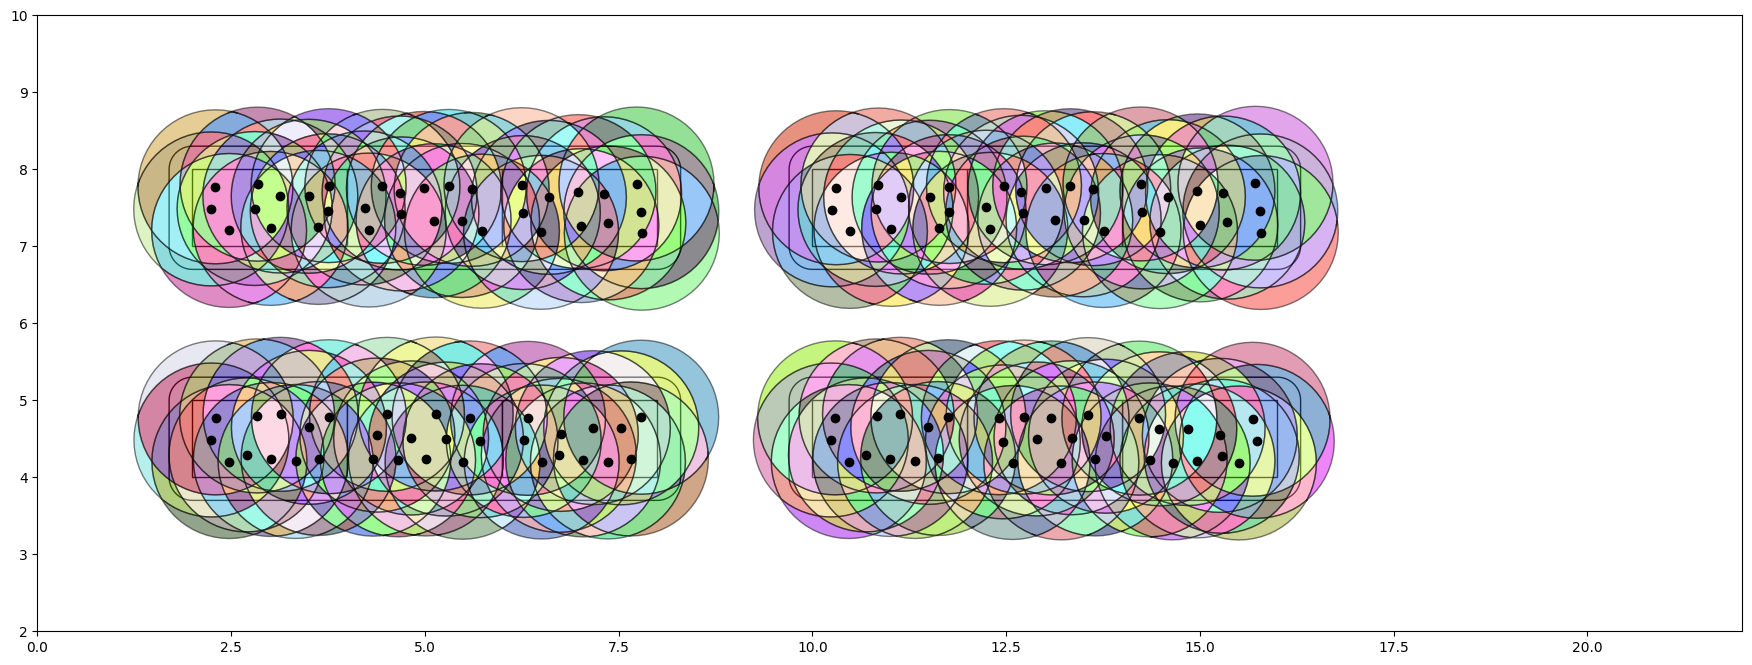

In [6]:
# Display the unique non-overlapping regions
visualiseScene(regions=x, plates=centers_list, show_table=True, tables=table, xlim=[0,22], ylim=[2,10])

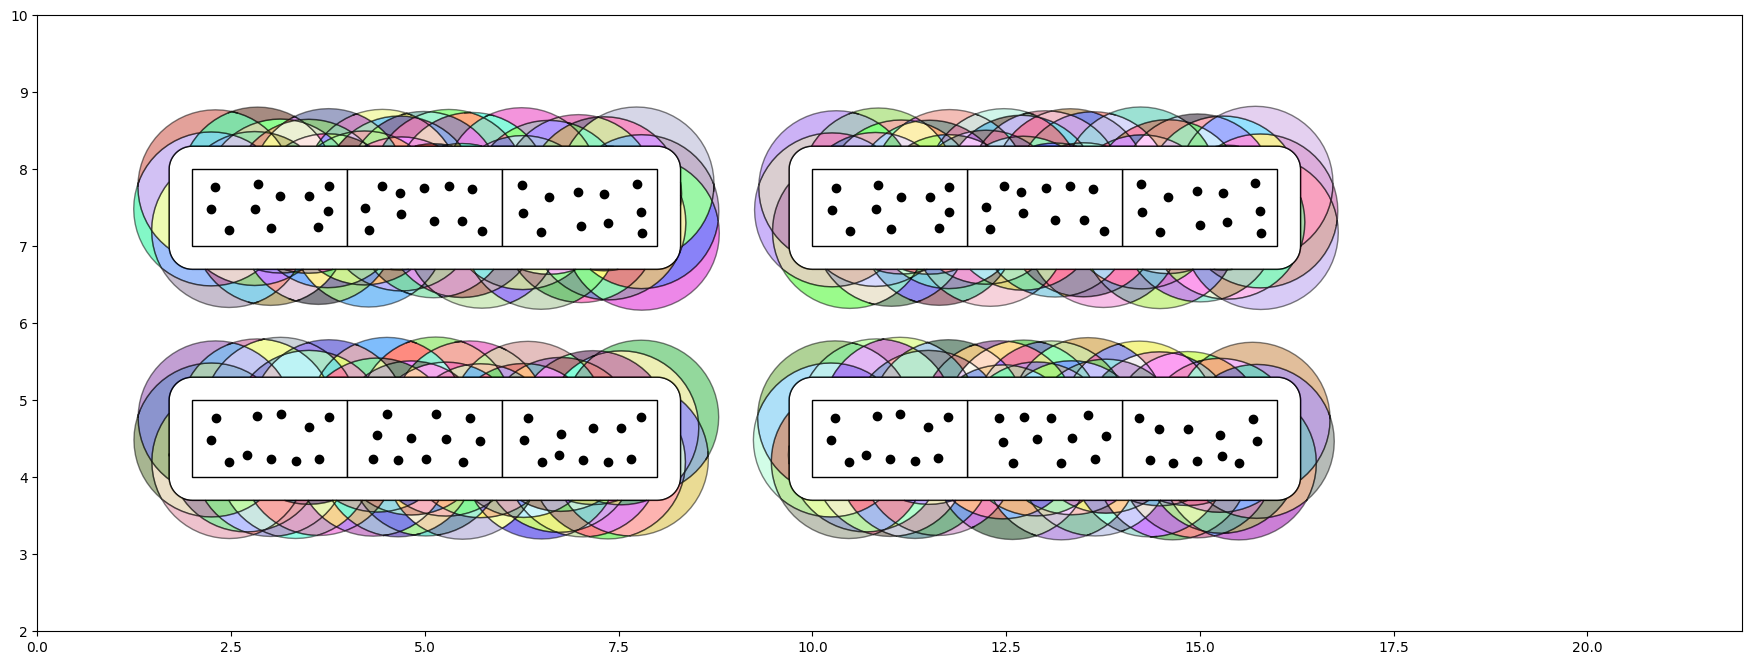

In [7]:
z = ExcludeTableRegion(x,table) # exclude the area occupied by the table and it's buffer region
visualiseScene(regions=z, plates=centers_list, show_table=True, tables=table, xlim=[0,22], ylim=[2,10])

In [8]:
Z = LinkRegionAndPlate(z, plates) # associate the unique region with the plates that it can reach

## 4. Generate waypoints iteratively

In [9]:
plates_remain = [plate for plate in plates]

waypoints = [start_point]
count = 0
while len(plates_remain) > 0:
    n1, d1 = getNearestPlate(waypoints[count], plates_remain) ## O(n)
    best_region, best_region_qty, best_region_area = getBestRegion(n1) ## O(m)
    waypoints.append(best_region.center)
    # printID(best_region.member_plate)
    updateRegions(Z, best_region.member_plate) ## O(n*m)
    plates_remain = [plate for plate in plates_remain if plate.id not in [plate.id for plate in best_region.member_plate]]
    # printID(plates_remain)
    # print()
    # print(len(plates_remain))
    
    count +=1

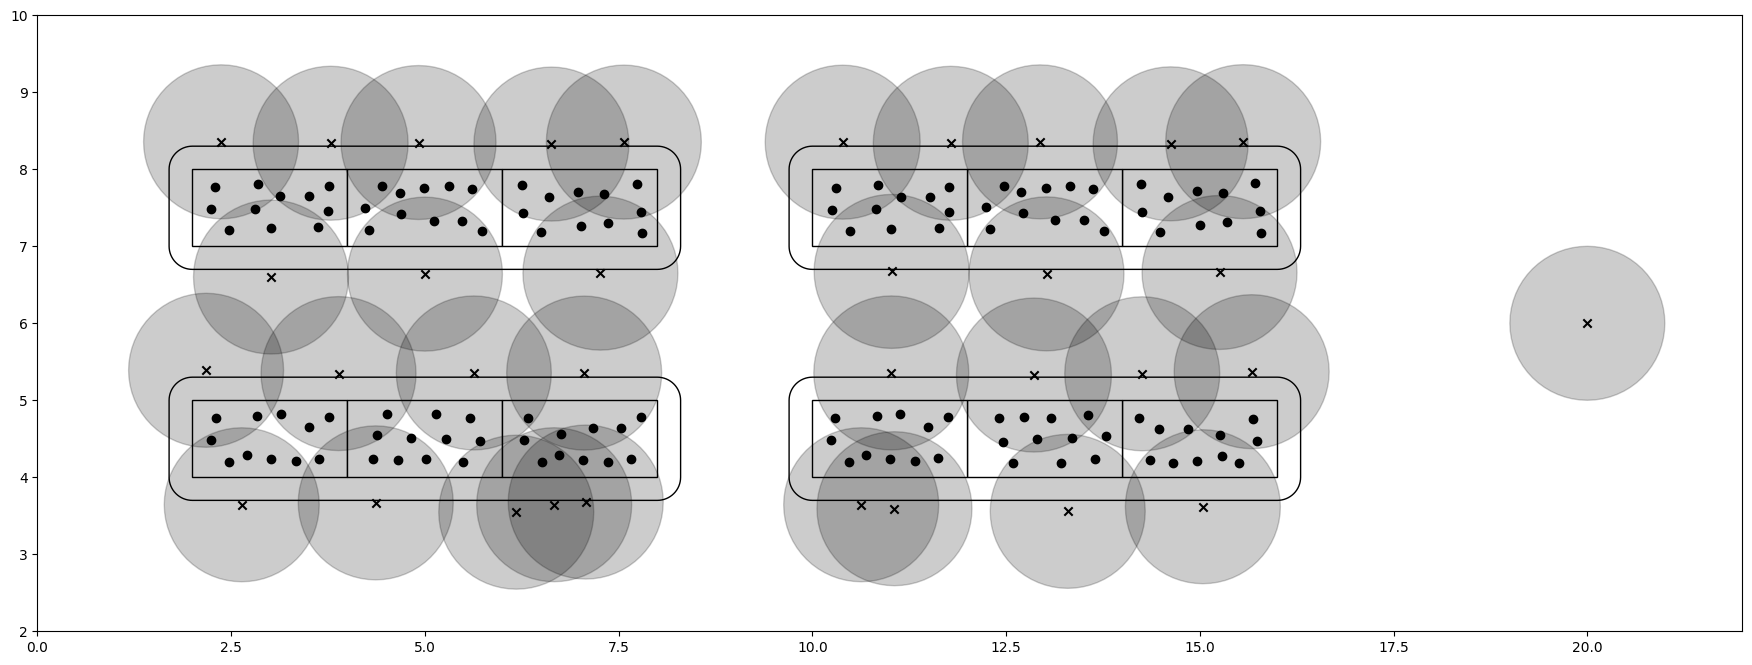

In [10]:
## Visualise final result
visualiseScene(waypoints=waypoints, plates=centers_list, show_table=True, tables=table, xlim=[0,22], ylim=[2,10])